Using one of the three datasets to demonstrate k-means clustering using the scikit learn package (50 points). Be sure to review the readings before you start on this assignment. Calculate the sum of least square error for each different values of 'k'. Using Matplotlib determine the optimal number of clusters (k) using the elbow method along with a brief explanation (50 points) . Finally plot the optimal clusters with their centroids along with a brief explanation (50 points). Comment your code as needed.

# Arrhythmia Data

## Importing the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
arrhythmia_data = pd.read_csv('arrhythmia.data', header=None)

arrhythmia_data = arrhythmia_data.dropna()
print(arrhythmia_data.head())

age_qt = arrhythmia_data[[0,6,7]]
age_qt.columns = ['Age', 'Q-T-interval', 'T-interval']
print(age_qt.head())

   0    1    2    3    4    5    6    7    8    9    ...  270   271  272  273  \
0   75    0  190   80   91  193  371  174  121  -16  ...  0.0   9.0 -0.9  0.0   
1   56    1  165   64   81  174  401  149   39   25  ...  0.0   8.5  0.0  0.0   
2   54    0  172   95  138  163  386  185  102   96  ...  0.0   9.5 -2.4  0.0   
3   55    0  175   94  100  202  380  179  143   28  ...  0.0  12.2 -2.2  0.0   
4   75    0  190   80   88  181  360  177  103  -16  ...  0.0  13.1 -3.6  0.0   

   274  275  276   277   278  279  
0  0.0  0.9  2.9  23.3  49.4    8  
1  0.0  0.2  2.1  20.4  38.8    6  
2  0.0  0.3  3.4  12.3  49.0   10  
3  0.0  0.4  2.6  34.6  61.6    1  
4  0.0 -0.1  3.9  25.4  62.8    7  

[5 rows x 280 columns]
   Age  Q-T-interval  T-interval
0   75           371         174
1   56           401         149
2   54           386         185
3   55           380         179
4   75           360         177


## Normalizing the Data

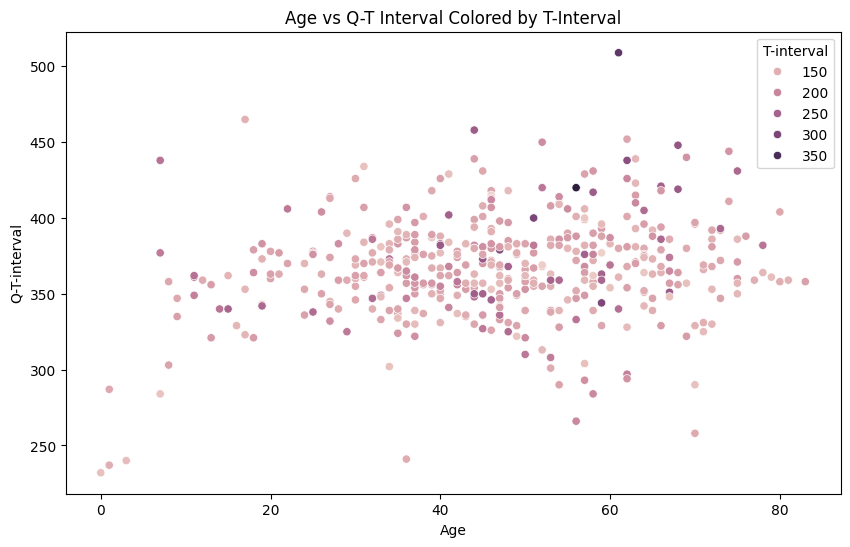

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = age_qt, x = 'Age', y = 'Q-T-interval', hue = 'T-interval')
plt.title('Age vs Q-T Interval Colored by T-Interval')
plt.show()

In [4]:
# Splitting the dataset into training and testing sets
X = age_qt[['Age', 'Q-T-interval']]
y = age_qt[['T-interval']] # Target (not used in clustering)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

#Normalizing the training and testing data
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [5]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Choosing the best number of clusters

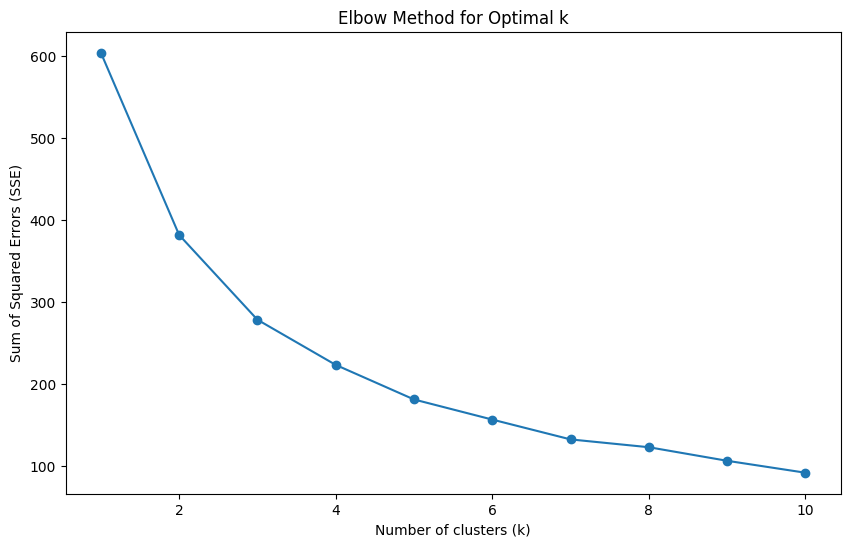

In [6]:
sse = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_train_scaled)
    sse.append(kmeans.inertia_)

# Plotting the elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

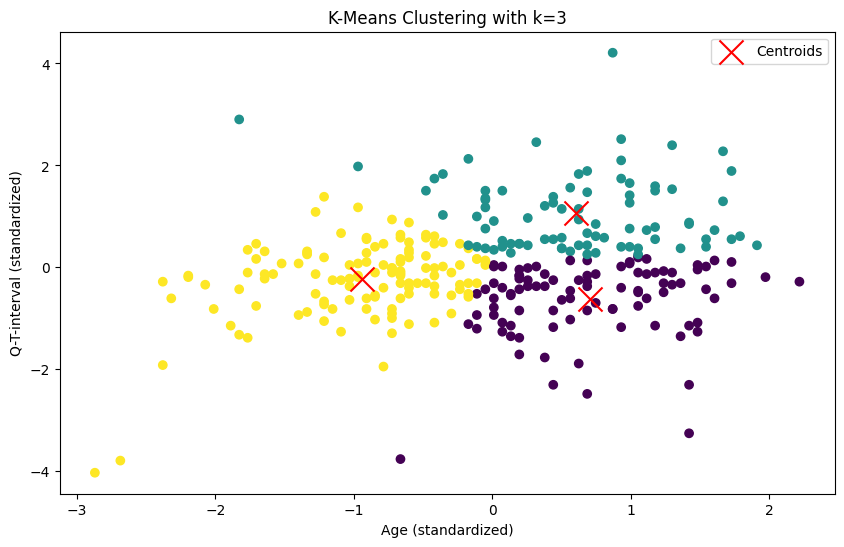

In [7]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X_train_scaled)

# Plot the clusters along with their centroids
plt.figure(figsize=(10, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=clusters, marker='o')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroids')

plt.xlabel('Age (standardized)')
plt.ylabel('Q-T-interval (standardized)')
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.legend()
plt.show()

The elbow method gave us a k of 3, so we were able to create 3 clusters of patient data based off of their age, QT interval, and T interval. This shows that there may be age-related partterns in QT intervals and may help us in understanding who is affected by prolonged QT and/or Long QT Syndrome. This could potentially be used to help train other machine learning models to predict the likelihood of a patient to have prolonged QT.